## <center> - Source Distribution on an Airfoil -
<center>Ali Alaraini
<br><center>Feburary 12 2020
    <br><center> Assignment 1


In [1]:
import math 
import numpy as np
from matplotlib import pyplot
%matplotlib inline 

In [2]:
N = 51                        # number of mesh points in each direction 
x_s, x_e = -1.0, 2.0          # x-direction boundaries
y_s, y_e = -0.5, 0.5          # y-direction boundaries


x = np.linspace(x_s, x_e, N) #1-D array for x
y = np.linspace(y_s, y_e, N) #1-D array for y
X, Y = np.meshgrid(x, y) 

In [3]:
u_inf = 1.0        # freestream speed

# compute the freestream velocity field
# create an array of size N for u_freestream and v_freestream

u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# compute the free stream-function
psi_freestream = u_inf * Y

# compute the free potential function
phi_freestream = u_inf * X

In [22]:
def get_velocity(strength, xs, ys, X, Y):
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    return u, v

In [23]:
def get_stream_function(strength, xs, ys, X, Y):
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs)) 
    """
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    return psi

In [24]:
def get_potential( strength, xs, ys, X, Y):
    phi = strength/(4*np.pi)*(np.log((X-xs)**2+(Y-ys)**2))
    """
    Returns
    -------
    phi: 2D Numpy array of floats
        The veolcity Potential-function.
    """
    return phi

In [8]:
#Read text files into python 
strength = np.loadtxt('NACA0012_sigma.txt', dtype=float, delimiter='\n', unpack = True)   #Strength of each source point
x_source = np.loadtxt('NACA0012_x.txt', dtype=float, delimiter='\n', unpack = True)       #Source location on x-direction
y_source = np.loadtxt('NACA0012_y.txt', dtype=float, delimiter='\n', unpack = True)       #source location on y-direction

In [9]:
# Iteration to find the values of veolcity and stream function for each source location and sigma value
#Intialize each set of array 
final_u = np.zeros((N,N))
final_v = np.zeros((N,N))
final_psi = np.zeros((N,N))
final_phi = np.zeros((N,N))
#For loop to calculate each point 
for i in range(len(x_source)):
    u, v = get_velocity(strength[i], x_source[i], y_source[i], X, Y)
    psi = get_stream_function(strength[i], x_source[i], y_source[i], X, Y)
    phi = get_potential(strength[i], x_source[i], y_source[i], X, Y) 
    final_psi += psi
    final_u += u
    final_v += v
    final_phi += phi


**<center>Create plots to visualize and inspect the resulting flow pattern: **

$1$. Stream lines in the domain and the profile of our NACA0012 airfoil, in one plot

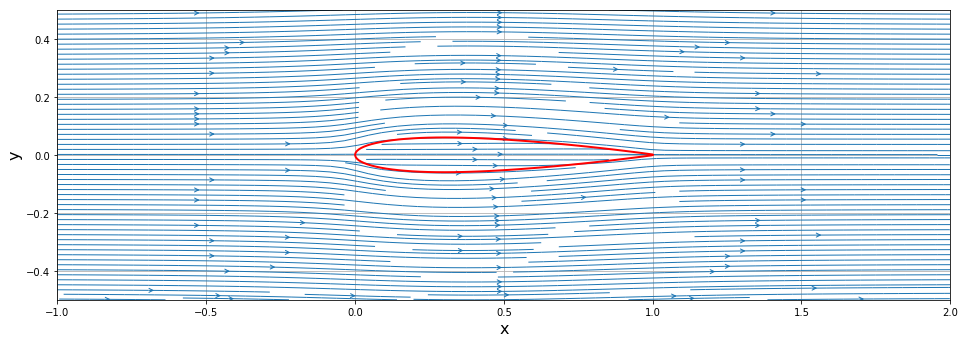

In [10]:
# superposition of the source on the freestream
u = u_freestream + final_u
v = v_freestream + final_v
psi = psi_freestream + final_psi
phi = phi_freestream + final_phi

# plot the streamlines
width = 16
height = (y_e - y_s) / (x_e - x_s) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_s, x_e)
pyplot.ylim(y_s, y_e)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.plot(x_source,y_source, color='red', linewidth = 2, linestyle = 'solid' )

pyplot.show()

$2$. Velocity potential in the domain and the profile of our NACA0012 airfoil, in one plot

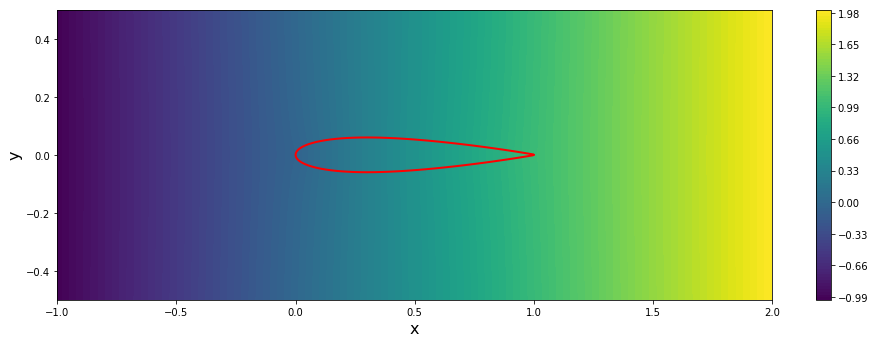

In [16]:
width = 16
height = (y_e - y_s) / (x_e - x_s) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_s, x_e)
pyplot.ylim(y_s, y_e)
pyplot.contourf(X,Y, phi, 100)
pyplot.colorbar()

pyplot.plot(x_source,y_source, color='red', linewidth = 2, linestyle = 'solid' )
pyplot.show()

In [12]:
#Calculate the value of the maximum pressure 
cp = 1.0 - (u**2 + v**2) / u_inf**2
cp_max= np.max(cp) 

#location of the maximum pressure
cp_max_loc = np.argmax(cp)

#The value of the maximum pressure rounded to 3 digits 
cp_max = round(cp_max, 3)
print(cp_max)


0.471


In [13]:
#The location of the maximum pressure in the matrix
np.unravel_index(cp_max_loc, [51,51]) 

(25, 16)

$3$. Distribution of the pressure coefficient and a single marker on the location of the maximum pressure

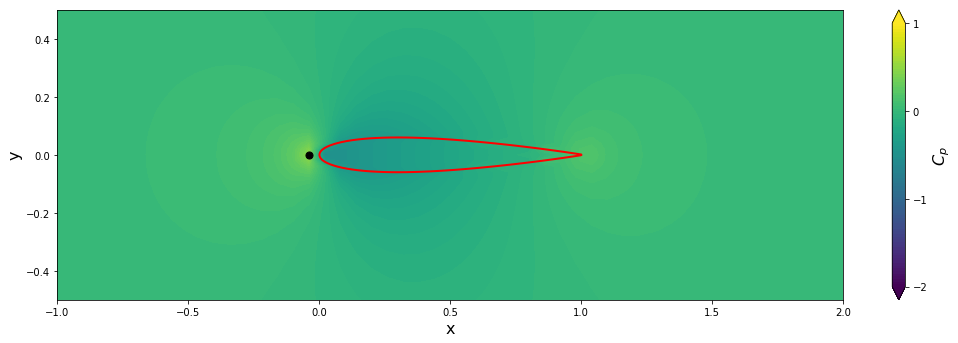

In [20]:
width = 16
height = (y_e - y_s) / (x_e- x_s) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_s, x_e)
pyplot.ylim(y_s, y_e)
contf = pyplot.contourf(X, Y, cp, levels=np.linspace(-2.0, 1.0, 100), extend='both')

cbar = pyplot.colorbar(contf)

cbar.set_label('$C_p$', fontsize=16)

cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

pyplot.plot(x_source,y_source, color='red', linewidth = 2, linestyle = 'solid' )

#Single black marker on the location of the maximum pressure 
pyplot.scatter(X[25,16], Y[25,16], s=50, color='black', marker='o' )
pyplot.show()


## Questions:

**1. What is the value of maximum pressure coefficient, $C_p$?**
    <br>
     0.471
<br> **2. What are the array indices for the maximum value of $C_p$?**
<br>
     [25,16]

##### Briefly answer these questions

<br> **1. Do the stream lines look like you expected?**
<br><br>The streamlines are moving in the positive direction as the freestream veolcity is positive and the direction of the veolcity due to the sources is also positive

<br> **2. What does the distribution of pressure tell you about lift generated by the airfoil?**
<br><br> The distribution of the pressure around the airfoil indicates that there is no lieft generated aganist the airfoil as the pressure under the wing should be higher to create that lift. This is due to the fact that the aifoil is symmetric and has lengths of equal size between the top and bottom airfoil which causes equal distribution of pressure 

<br> **3. Does the location of the point of maximum pressure seem right to you?**
<br><br> Yes. Since the angle of attack is $0^{\circ}$ and that the flow comes to a psoition where the veolcity in the y direction is at its minimum. 